# An Analysis of English Housing Prices Between September 2016 to September 2019

## Table of Contents

**Section 1: Introducing the Dataset**
  * Section 1.1: Loading the Data
  * Section 1.2: Creating the Regional and Area Dataframes
  * Section 1.3: Add Region Names to Area Dataframe
  * Section 1.4: Checking for Null Values
  
      * Section 1.4.1: Checking for Null Values in the Area Dataframe
      * Section 1.4.2: Checking for Null Values in the Region Dataframe
  <br><br>

**Section 2: Exploratory Trends**
  * Section 2.1: General Overview of Flat and Detached Property Prices
  * Section 2.2: Comparing Detached Property and Flat Prices Per Region
  * Section 2.3: A Closer Look at Flat Prices
  * Section 2.4: A Closer Look at Detached Prices
  <br><br>

**Section 3: Exploratory Data Analysis**
  * Section 3.1: Finding the Percent Change in Price Per Area
  * Section 3.2: Percent Change in Flat Prices Visualizations
  <br><br>

**Section 4: Statistical Analysis**
  * Section 4.1: Cross Tabulation
  * Section 4.2: Do the regions differ?

## Section 1: Introducing the Dataset

### Section 1.1: Load the Data

The dataset has information about the average price of properties (detached, semi, terraced, and flat) over 36 months in different areas of England.

The dataset contains the following fields: <br>

| Name          |      Description                                                                 |
|:--------------|:--------------------------------------------------------------------------------:|      
|Date           | A date, which is the first of the month, between September 1st 2016 <br>and August 1st 2019. 36  months in total.|                            
|Area           | The name of an area (or region – will split below)               |
|Code           | The code for the area (or region – will split below)             | 
|Detached       | Average sale price of a detached property in this area in the month                           | 
|Semi           | Same, for semi-detached property.                         | 
|Terraced       | Same, for a terraced property                             | 
|Flat           | Same, for a flat.                                         | 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
prices = pd.read_csv('average-property-price.csv')
prices = prices.assign(Month = pd.to_datetime(prices['Date'], dayfirst=True)).drop(labels='Date', axis=1)
prices.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


### Section 1.2: Creating the Regional and Area Dataframes

Since data for England's 9 regions was also in the same data frame above, we extracted all the regional data and made it into a new table.

In [ ]:
# Extract regional data into a separate df
regional = prices.loc[prices['Code'].str.contains("E12")]
regional.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
5436,North East,E12000001,208117.1739,125683.3380,101385.68860,89361.51412,2016-09-01
5437,North East,E12000001,208519.1158,125464.3201,99998.54363,89716.48508,2016-10-01
5438,North East,E12000001,210555.4948,126082.1090,100433.81080,90065.71739,2016-11-01
5439,North East,E12000001,211728.7243,127186.0647,102150.75450,91195.50119,2016-12-01
5440,North East,E12000001,205942.7099,123088.4533,98112.30132,88170.43214,2017-01-01


The data frame below was contains all the area data extracted from the original data frame.

In [ ]:
# Extract area data into a separate df
area = prices.loc[~prices['Code'].str.contains("E12")]
area.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01


### Section 1.3: Add Region Names to Area Dataframe

The table below displays which region each area belongs to. 

In [ ]:
# Load location codes file
locations = pd.read_csv('location-codes.csv')
locations.head()

,AuthorityCode,AuthorityName,RegionCode,RegionName
0,E06000001,Hartlepool,E12000001,North East
1,E06000002,Middlesbrough,E12000001,North East
2,E06000003,Redcar and Cleveland,E12000001,North East
3,E06000004,Stockton-on-Tees,E12000001,North East
4,E06000005,Darlington,E12000001,North East


We have used the Authority Code column to match each area to its corresponding region. A region column was then added to the area table.

In [ ]:
# Make dictionary of Authority Codes and Region names
keys = locations['AuthorityCode'].values
values = locations['RegionName'].values 
regions_dict = dict(zip(keys, values))

# Define function to assign region name to a row based on authority code
def regions(row):
    if row['Code'] in regions_dict.keys(): return regions_dict[row['Code']]
    return 'Not Assigned' #will use to check if we missed an area

# Apply function, add region column
area = area.assign(Region = area.apply(regions, axis=1))
area.head()

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
0,Hartlepool,E06000001,179323.3934,108357.4457,77192.90613,62078.20672,2016-09-01,North East
1,Hartlepool,E06000001,178880.9745,107765.1346,76294.05974,61893.84174,2016-10-01,North East
2,Hartlepool,E06000001,179855.0608,107886.9468,76066.73993,61909.33647,2016-11-01,North East
3,Hartlepool,E06000001,182847.8194,109312.3743,77019.16134,62919.44401,2016-12-01,North East
4,Hartlepool,E06000001,177454.1433,105828.3642,74522.27530,60770.80795,2017-01-01,North East


Based on our filtering, we can see that all areas have been assigned a region. There are no areas with no region name. 

In [ ]:
area.loc[area['Region'] == 'Not Assigned']

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region


### Section 1.4: Checking for Null Values

#### Section 1.4.1: Checking for Null Values in the Area Dataframe

Based on our table filtering, all area null values are in the City of London, from 2016 to 2019. These null values are found in the Detached, Semi, and Terraced columns. Since we are only looking at flat prices in this dataframe, we can leave these as is since we will not be touching these columns.	

In [ ]:
area[area.isnull().any(axis=1)]

,Area,Code,Detached,Semi,Terraced,Flat,Month,Region
3276,City of London,E09000001,NaN,NaN,1189233.714,777891.9778,2016-09-01,London
3277,City of London,E09000001,NaN,NaN,1195010.116,790055.2118,2016-10-01,London
3278,City of London,E09000001,NaN,NaN,1229507.612,815992.8991,2016-11-01,London
3279,City of London,E09000001,NaN,NaN,1217012.801,809149.8515,2016-12-01,London
3280,City of London,E09000001,NaN,NaN,1227434.570,817654.0898,2017-01-01,London
3281,City of London,E09000001,NaN,NaN,1189660.065,818093.5200,2017-02-01,London
3282,City of London,E09000001,NaN,NaN,1176573.144,851416.0699,2017-03-01,London
3283,City of London,E09000001,NaN,NaN,1238739.417,903551.8492,2017-04-01,London
3284,City of London,E09000001,NaN,NaN,1277795.874,937307.4240,2017-05-01,London
3285,City of London,E09000001,NaN,NaN,1174213.336,928316.5022,2017-06-01,London


### Section 1.4.2: Checking for Null Values in the Region Dataframe

The region dataframe has no null values based on our filtering. 

In [ ]:
regional[regional.isnull().any(axis=1)]

,Area,Code,Detached,Semi,Terraced,Flat,Month


## Section 2: Exploratory Trends

### Section 2.1: General Overview of Flat and Detached Property Prices

Below we have plotted the price trends of all the regions into two separate plots, one for flat prices and another for detached property prices. 


The following observations can be gathered from the the charts below:
* London prices are much higher than the other regions, for both flats and detached properties.

* In both plots, the following areas are the most expensive (from most to less expensive): London, South East, Yorkshire and The Humber, South West, West Midlands Region. 

* In both the flat and detached plots, the following three regions have similar prices: North West, East Midlands, and East of England. 

* The prices in the North East region are the lowest when it comes to flats and detached properties. 

In [ ]:
regional_pivot_flat = regional.pivot(index='Month', columns='Area', values='Flat')

# Set colors via a dictionary with regions as keys
colors = {'East Midlands': 'darkcyan', 'East of England': 'coral', 'London': 'darkred', 
          'North East': 'gold', 'North West': 'indigo',	'South East': 'lime', 'South West': 'blue',	
          'West Midlands Region': 'black', 'Yorkshire and The Humber':'chocolate'}

# Convert Month datetime to date so that x-tick labels show up nicely
table_xlabels = pd.DataFrame(regional_pivot_flat.index)
table_xlabels['Month'] = pd.to_datetime(table_xlabels['Month']).dt.date

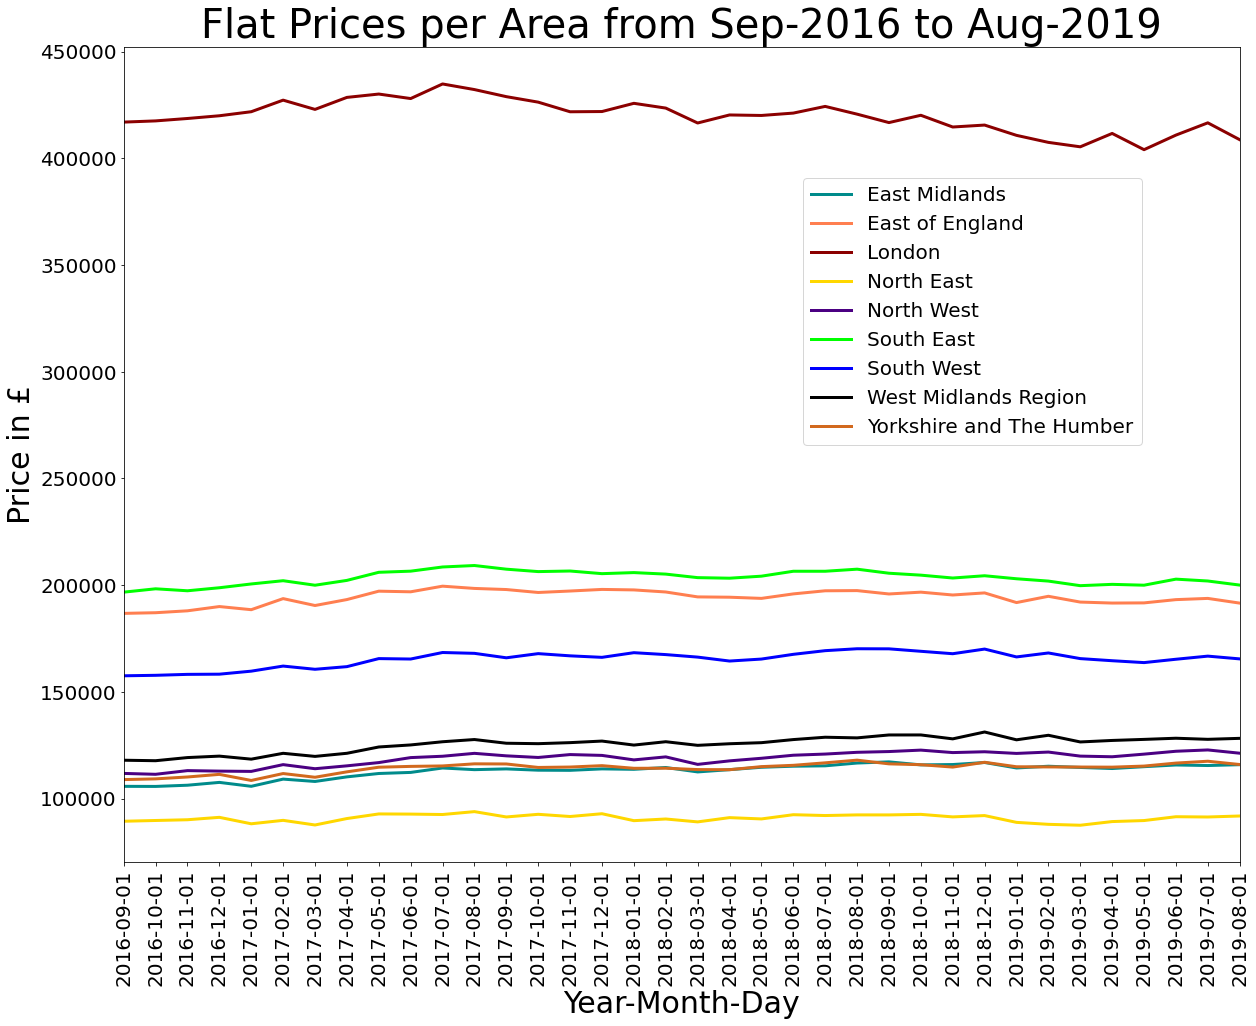

In [ ]:
#plot

regional_pivot_flat.plot(color=colors, figsize=(20, 15), linewidth=3)

plt.title('Flat Prices per Area from Sep-2016 to Aug-2019', fontsize=40)

plt.xticks(ticks=regional_pivot_flat.index, labels = table_xlabels['Month'], rotation=90,fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Year-Month-Day", fontsize=30)
plt.ylabel("Price in £", fontsize=30)

plt.legend(loc='best', bbox_to_anchor= (0.6,0.5), prop={'size':20})

plt.show()

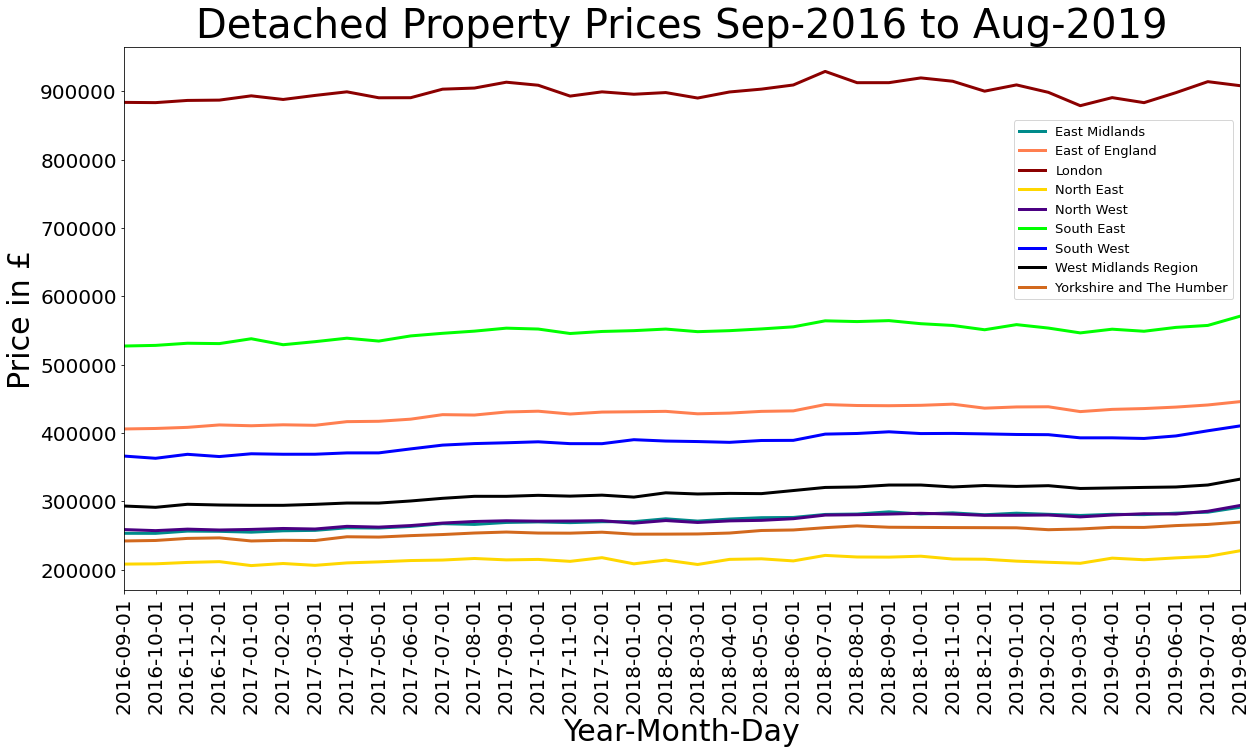

In [ ]:
regional_pivot_detached = regional.pivot(index='Month', columns='Area', values='Detached')

#plot

regional_pivot_detached.plot(color=colors, figsize=(20, 10), linewidth=3)

plt.title('Detached Property Prices Sep-2016 to Aug-2019', fontsize=40)

plt.xticks(ticks=regional_pivot_detached.index, labels=table_xlabels['Month'], rotation=90,fontsize=20)
plt.yticks(fontsize=20)

plt.xlabel("Year-Month-Day", fontsize=30)
plt.ylabel("Price in £", fontsize=30)

plt.legend(loc='center right', bbox_to_anchor= (1,0.7), prop={'size':13})

plt.show()

In [ ]:
flat_range = regional_pivot_flat.max().max() - regional_pivot_flat.min().min()
detached_range = regional_pivot_detached.max().max() - regional_pivot_detached.min().min()

print(f'The range of flat prices is {flat_range}')

print(f'The range of detached property prices is {detached_range}')

The range of flat prices is 347345.70707
The range of detached property prices is 723068.2542


Lastly, as seen above and as confirmed by the different plot axes, the detached properties have a wider range of prices throughout England as compared to flat prices. 

### Section 2.2: Comparing Detached Property and Flat Prices Per Region

In the visualizations below, we see detached property prices plotted in blue and flat prices plotted in red. It is clear that detached property prices are much higher than flat prices, and this holds true across all regions. Just based off the axes of the line graphs, it seems that detached property prices are roughly twice the price of flats, and this is true across all regions. 

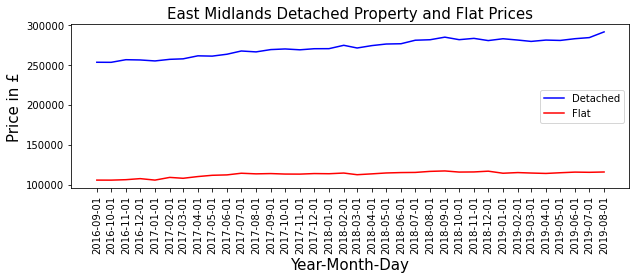

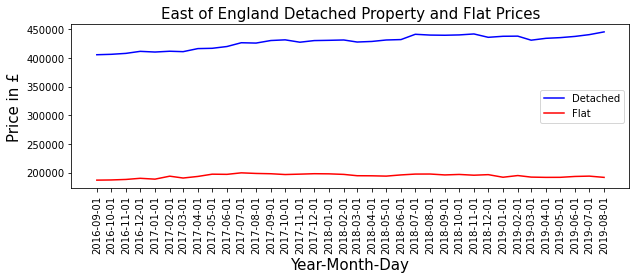

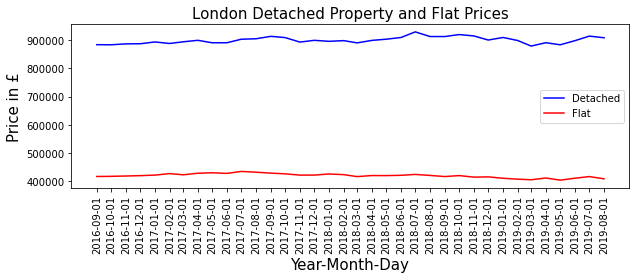

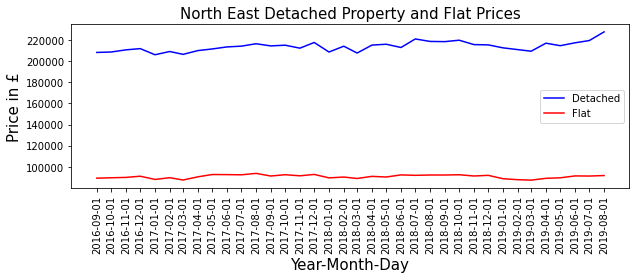

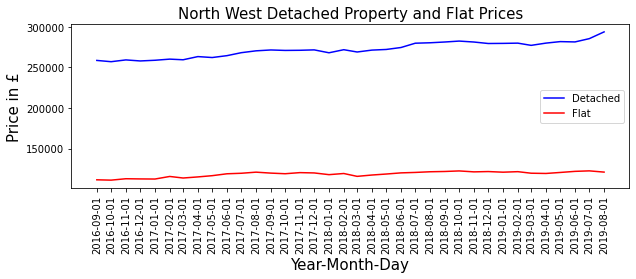

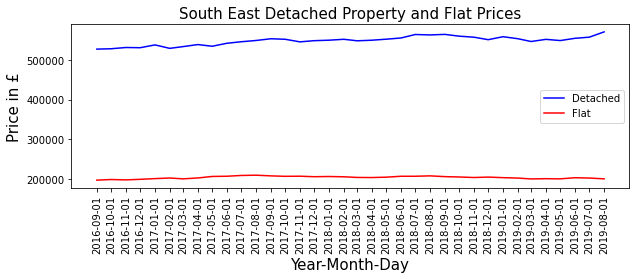

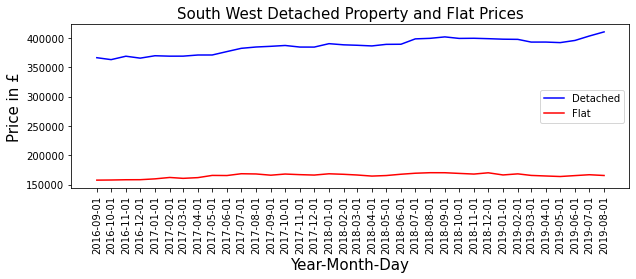

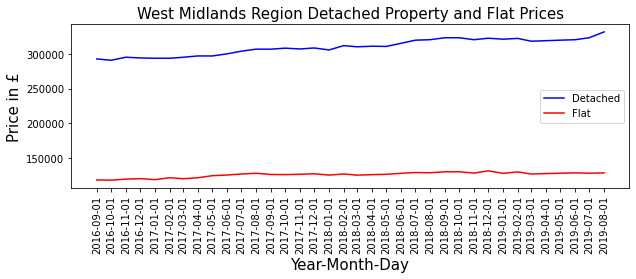

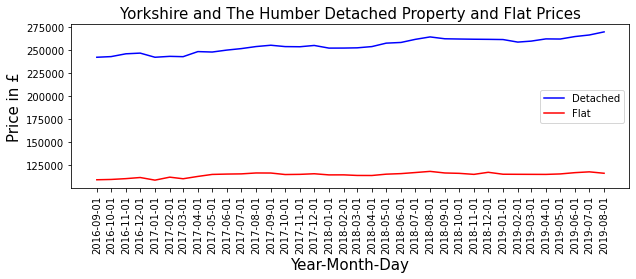

In [ ]:
regions_list = regional_pivot_detached.columns

for region in regions_list:
    plt.figure(figsize=(10, 3))
    plt.plot(regional_pivot_detached.index, regional_pivot_detached[region], color='blue', label='Detached')
    plt.plot(regional_pivot_detached.index, regional_pivot_flat[region], color='red', label='Flat')

    plt.title(f'{region} Detached Property and Flat Prices', fontsize=15)

    plt.xticks(ticks=regional_pivot_detached.index, labels=table_xlabels['Month'], rotation=90,fontsize=10)
    plt.yticks(fontsize=10)

    plt.xlabel("Year-Month-Day", fontsize=15)
    plt.ylabel("Price in £", fontsize=15)

    plt.legend(loc='center right')

    plt.show()

### Section 2.3: A Closer Look at Flat Prices

Below we see a closer look at flat prices per region.


Based off the graphs, we observe the following trends:
* The most dramatic drops in prices tend to occur during the first three months of the year.
* London was the only region where flat prices decreased by the end of the 36 month time frame.
* The North East Region has the most volatile prices.

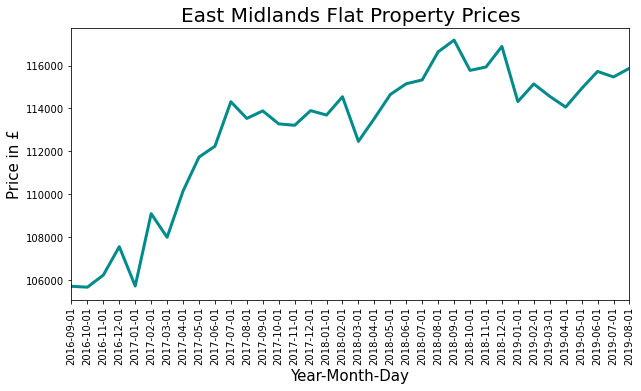

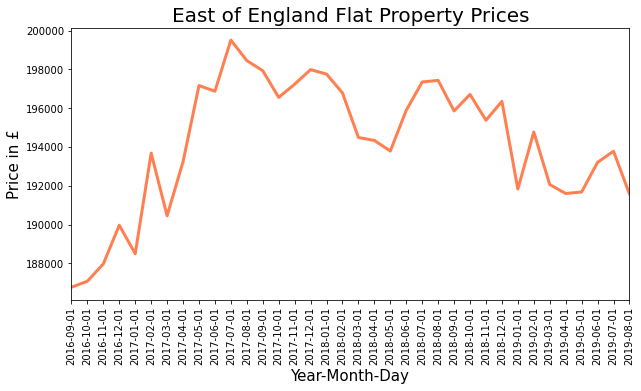

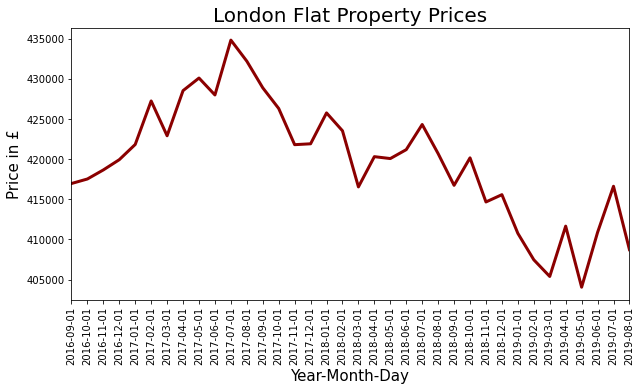

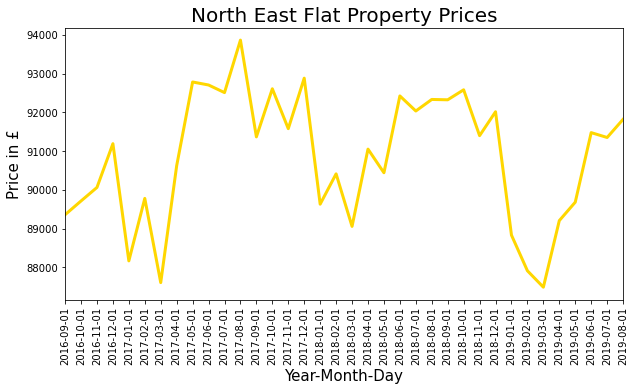

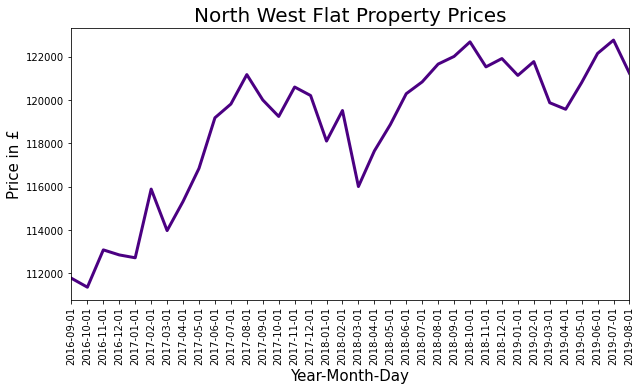

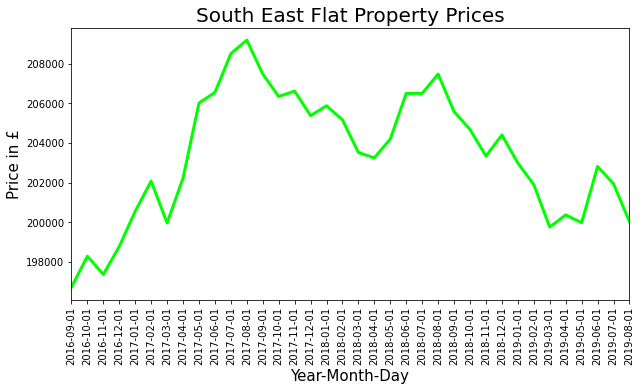

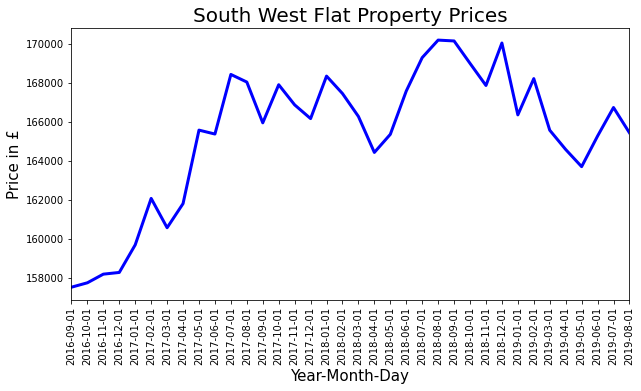

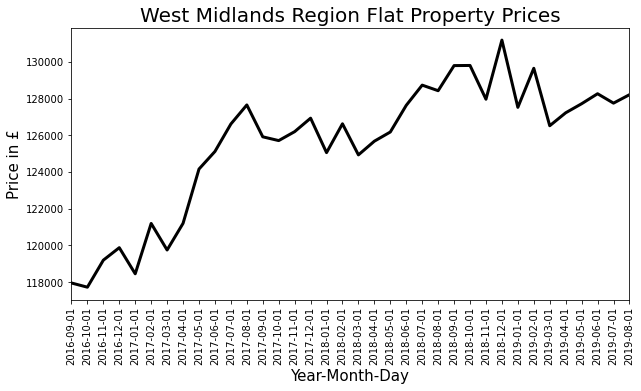

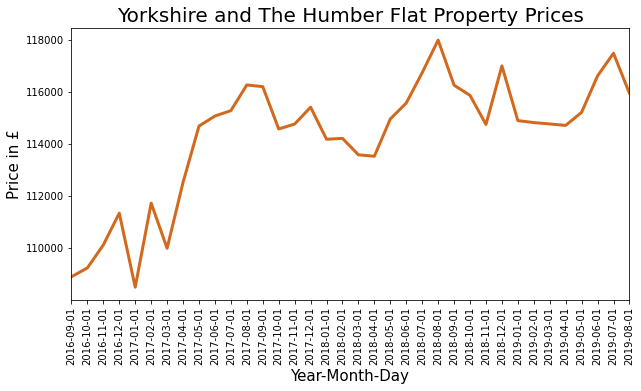

In [ ]:
#plot

for region in regions_list:
    regional_pivot_flat[region].plot(color=colors, figsize=(10, 5), linewidth=3)

    plt.title(f'{region} Flat Property Prices', fontsize=20)

    plt.xticks(ticks=regional_pivot_flat.index, labels=table_xlabels['Month'], rotation=90,fontsize=10)
    plt.yticks(fontsize=10)

    plt.xlabel("Year-Month-Day", fontsize=15)
    plt.ylabel("Price in £", fontsize=15)

    plt.show()

### Section 2.4: A Closer Look at Detached Prices

Below we see a closer look at detached property prices per region.


Based off the graphs, we observe the following trends:
* Similar to flat prices, the most dramatic drops in prices tend to occur during the first three months of the year.
* Unlike the flat prices, all regions saw an increase in detached prices by the end of the 36 month timeframe.
* London and the North East region seemed to have the most volatile prices.

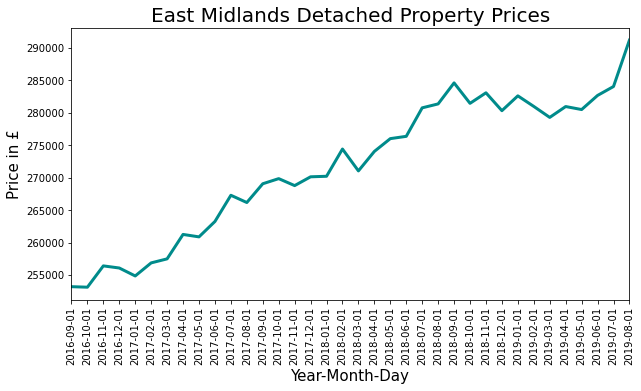

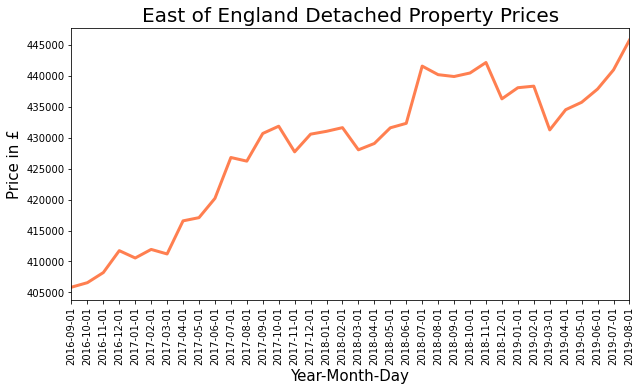

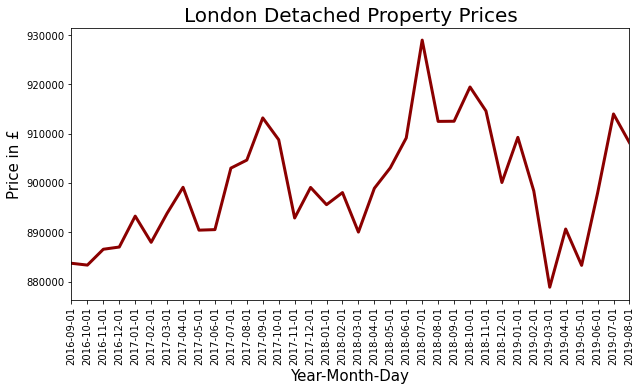

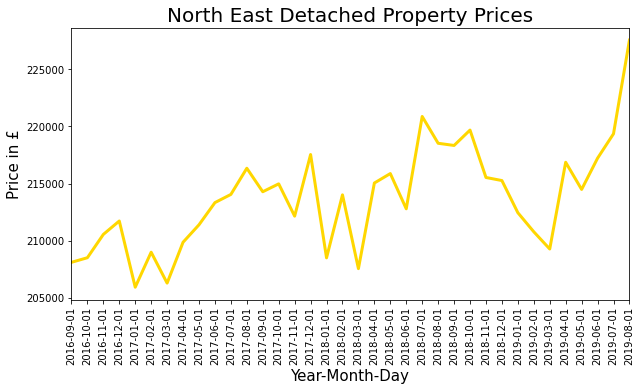

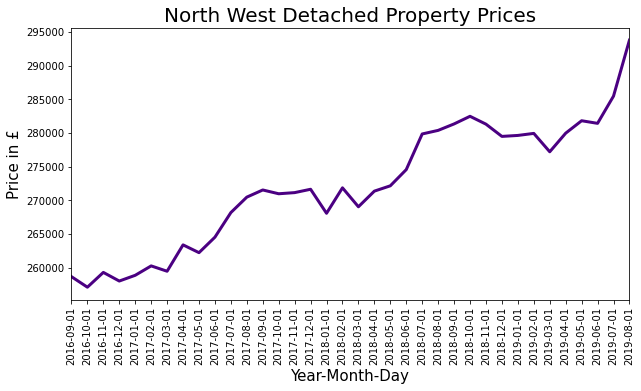

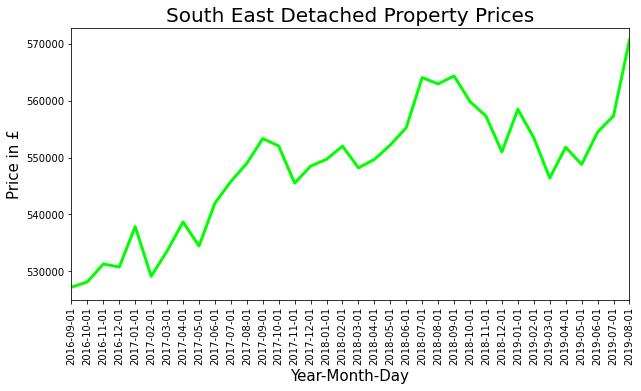

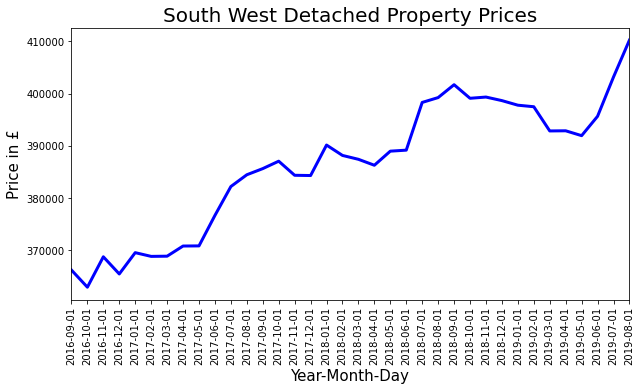

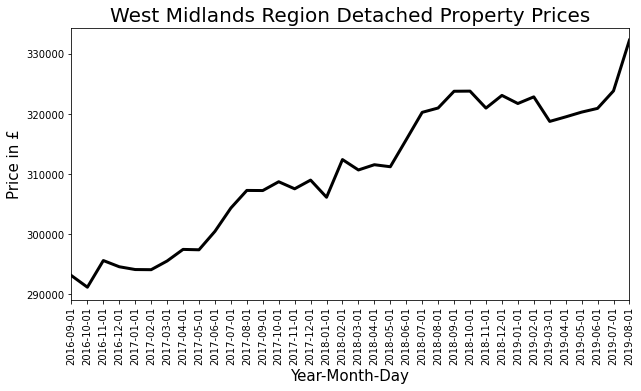

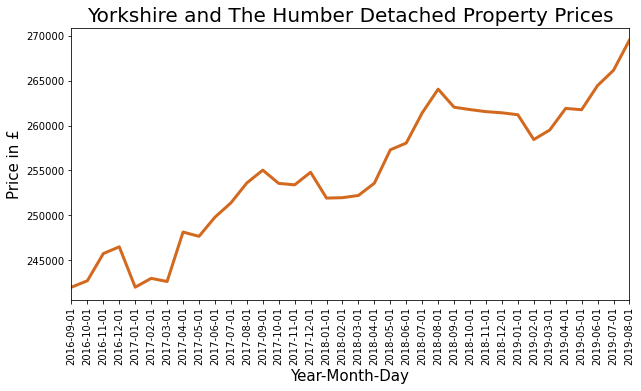

In [ ]:
#plot

for region in regions_list:
    regional_pivot_detached[region].plot(color=colors, figsize=(10, 5), linewidth=3)

    plt.title(f'{region} Detached Property Prices', fontsize=20)

    plt.xticks(ticks=regional_pivot_detached.index, labels=table_xlabels['Month'], rotation=90,fontsize=10)
    plt.yticks(fontsize=10)

    plt.xlabel("Year-Month-Day", fontsize=15)
    plt.ylabel("Price in £", fontsize=15)

    plt.show()

## Section 3: Flat Price Changes Per Area

### Section 3.1: Finding the Percent Change in Price Per Area

In this section, we will only be looking at the change in price in flats per area. Since we won't be needing the information for the other property types, we can drop them from the table to work with the flat prices more easily.

Since we are looking at the price change from July 2017 to July 2018, the price data for these two months is listed below. 

In [ ]:
area_analysis = area[(area['Month'] >= '2017-07-01') & (area['Month'] <= '2018-07-01')]
area_analysis = area_analysis.drop(columns=['Code', 'Detached',	'Semi','Terraced'])
area_analysis.head(5)

,Area,Flat,Month,Region
10,Hartlepool,65007.84170,2017-07-01,North East
11,Hartlepool,62699.57580,2017-08-01,North East
12,Hartlepool,62081.11571,2017-09-01,North East
13,Hartlepool,61066.78104,2017-10-01,North East
14,Hartlepool,61750.52052,2017-11-01,North East


The table below has added the July 2018 prices to a different column to facilitate to the analysis. 

In [ ]:
area_analysis = area[area['Month'] == '2017-07-01']
area_analysis = area_analysis.drop(columns=['Code', 'Detached',	'Semi','Terraced'])
area_analysis.reset_index(drop=True, inplace=True)

area_july2018 = area[area['Month'] == '2018-07-01']
area_july2018 = area_july2018.drop(columns=['Region','Code', 'Detached', 'Semi','Terraced'])
area_july2018.reset_index(drop=True, inplace=True)

area_analysis = area_analysis.join(area_july2018, rsuffix='2018')
area_analysis.head()

,Area,Flat,Month,Region,Area2018,Flat2018,Month2018
0,Hartlepool,65007.84170,2017-07-01,North East,Hartlepool,61116.82158,2018-07-01
1,Middlesbrough,69163.06963,2017-07-01,North East,Middlesbrough,69313.90788,2018-07-01
2,Redcar and Cleveland,65507.80990,2017-07-01,North East,Redcar and Cleveland,64802.79724,2018-07-01
3,Stockton-on-Tees,83599.32806,2017-07-01,North East,Stockton-on-Tees,83654.55272,2018-07-01
4,Darlington,87041.37973,2017-07-01,North East,Darlington,83679.31818,2018-07-01


The percent price change between July 2017 and July 2018 was calculated and the data was then grouped by Region to display the data in a more intuitive way. 

In [ ]:
area_analysis['2018 - 2017'] = area_analysis['Flat2018'] - area_analysis['Flat']
area_analysis['% Change'] = (area_analysis['2018 - 2017'] / area_analysis['Flat']) * 100

area_analysis_pivot = area_analysis.pivot_table(values=['% Change'], index=['Region', 'Area'])
area_analysis_pivot

% Change
Region                   Area                        
East Midlands            City of Derby       0.800656
                         City of Nottingham  1.318686
                         Derbyshire          2.036095
                         Leicester           4.412983
                         Leicestershire      2.220321
...                                               ...
Yorkshire and The Humber North Yorkshire     0.339442
                         Rotherham           2.632623
                         Sheffield           2.814313
                         Wakefield          -1.466420
                         York               -0.965102

[151 rows x 1 columns]

### Section 3.2: Percent Change in Flat Prices Visualizations

Below we have plotted the percent change in flat prices per area, grouped by which region they belong to. An interpretation of the visualizations is below. 

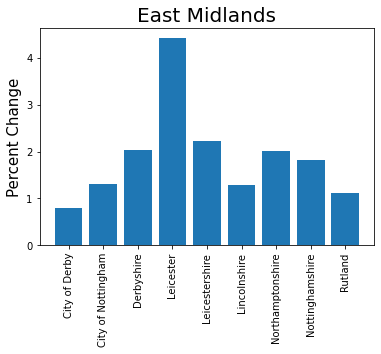

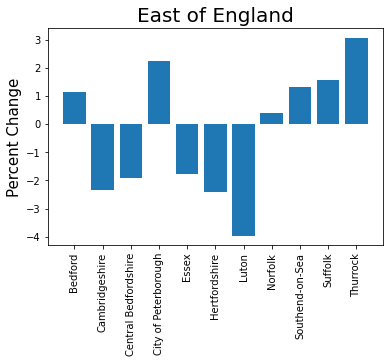

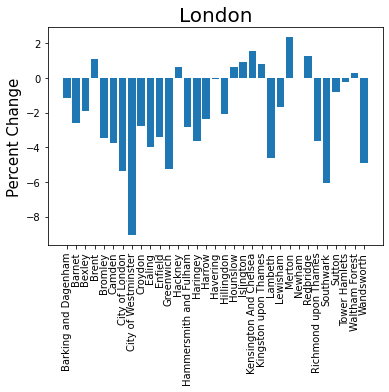

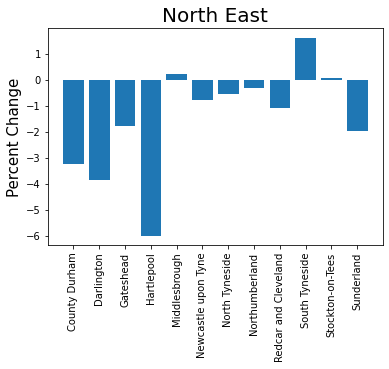

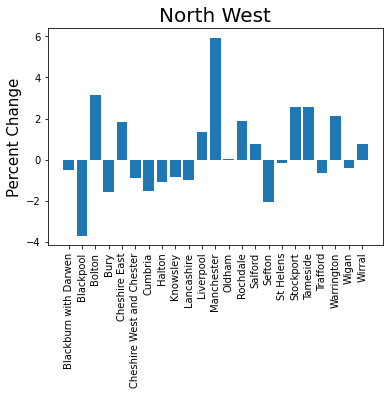

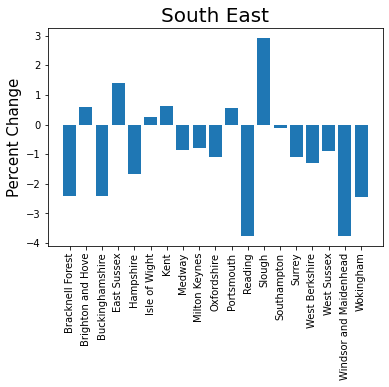

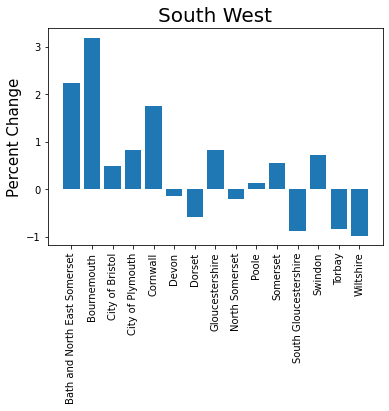

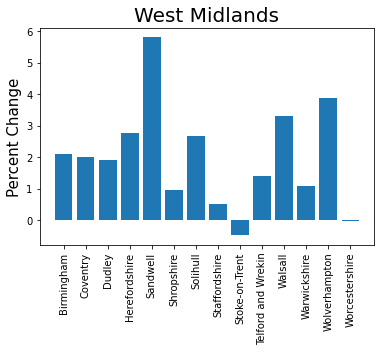

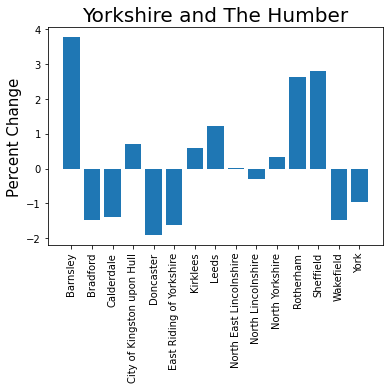

In [ ]:
regions_list = area_analysis_pivot.index.levels[0]
regions_list

for region in regions_list:
    df =  area_analysis_pivot.loc[region]
    plt.bar(df.index, df['% Change'])
    
    plt.title(f'{region}', fontsize=20)
    
    plt.xticks(rotation = 90)
    
    plt.ylabel("Percent Change", fontsize=15)
        
    plt.show()

The East Midlands and West Midlands bar charts show that most of the areas within those regions increased in price between July 2017 and July 2018.


The North East had London regions had a majority of areas where the price decreased during the same timeframe.

Lastly, the Yorkshire and The Humber and East of England regions roughly had the same number of areas that increased and decreased in flat prices.

## Section 4: Statistical Analysis

### Section 4.1: Cross Tabulation

In the table below, we dropped unnecessary columns and added a column to label the percent change as an increase or decrease.

In [ ]:
# Drop uneccesary columns
cross_tab_df = area_analysis.drop(columns=['Flat', 'Month', 'Area2018', 'Flat2018', 'Month2018', '2018 - 2017'])

# Define function to label incr/decr in price based on percent change
def change(row):
    if (row['% Change'] < 0) : return 'Decrease'
    if (row['% Change']  > 0) : return 'Increase'
    return 'Not Assigned'

# Apply function
classification = cross_tab_df.apply(change, axis=1)

# Create a dataframe of the select stations and their classification
classification = pd.DataFrame(classification)
classification.columns = ['Change']
classification

# Assign classification df as a column
cross_tab_df = cross_tab_df.join(classification)

cross_tab_df.head()

,Area,Region,% Change,Change
0,Hartlepool,North East,-5.985463,Decrease
1,Middlesbrough,North East,0.218091,Increase
2,Redcar and Cleveland,North East,-1.076227,Decrease
3,Stockton-on-Tees,North East,0.066059,Increase
4,Darlington,North East,-3.862601,Decrease


The table below shows how many areas increased or decreased in price between July 2017 and July 2018. For example, in the East Midlands region (first column), 0 areas decreased in price and 9 areas increased. In the North East region (fourth column), 9 areas decreased in price and 3 areas increased in price, and so on. 

Furthermore, this table confirms our observations from the previous section.

In [ ]:
cross_tab = pd.crosstab(cross_tab_df['Change'], cross_tab_df['Region'])
cross_tab

Region,East Midlands,East of England,London,North East,North West,South East,South West,West Midlands,Yorkshire and The Humber
Change,,,,,,,,,
Decrease,0,5,23,9,12,13,6,2,7
Increase,9,6,10,3,11,6,9,12,8


### Section 4.2: Do the regions differ?

We want to find out if the regions differ in the number of areas that increased/decreased in price, so will perform a chi-squared test and we assume a significance level of 0.05.
<br><br>
Our null hypothesis is that there is no difference and the alternative hypothesis is that there is a difference between regions.

In [24]:
import scipy.stats as stats

test_stat, p_value, dof, expected = stats.chi2_contingency(cross_tab, correction=False)

print('There are %d degrees of freedom' % dof)
print('The chi-squared test statistic is %4.2f' % test_stat)
print('The p-value is %4.3f %%' % (100 * p_value))


There are 8 degrees of freedom
The chi-squared test statistic is 27.60
The p-value is 0.056 %


Since there are 8 degrees of freedom, the X<sup>2 </sup> value for our 0.05 significance level is 15.51. Our calculated p-value is 0.00056, which is smaller than our chosen significance level of 0.05. This means there is less than a 5% probability that the null hypothesis is true. As such, we can reject the null hypothesis that there is no difference between regions, and we accept the alternative hypothesis that there is a difference between regions.